# IMPORTING LIBRARIES

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [46]:
strdata = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [47]:
#display the first 5 rows
strdata.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [48]:
# Dropping unnecessary column
strdata.drop('id',axis=1,inplace=True) 

In [49]:
strdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [50]:
# Displaying statistics
strdata.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

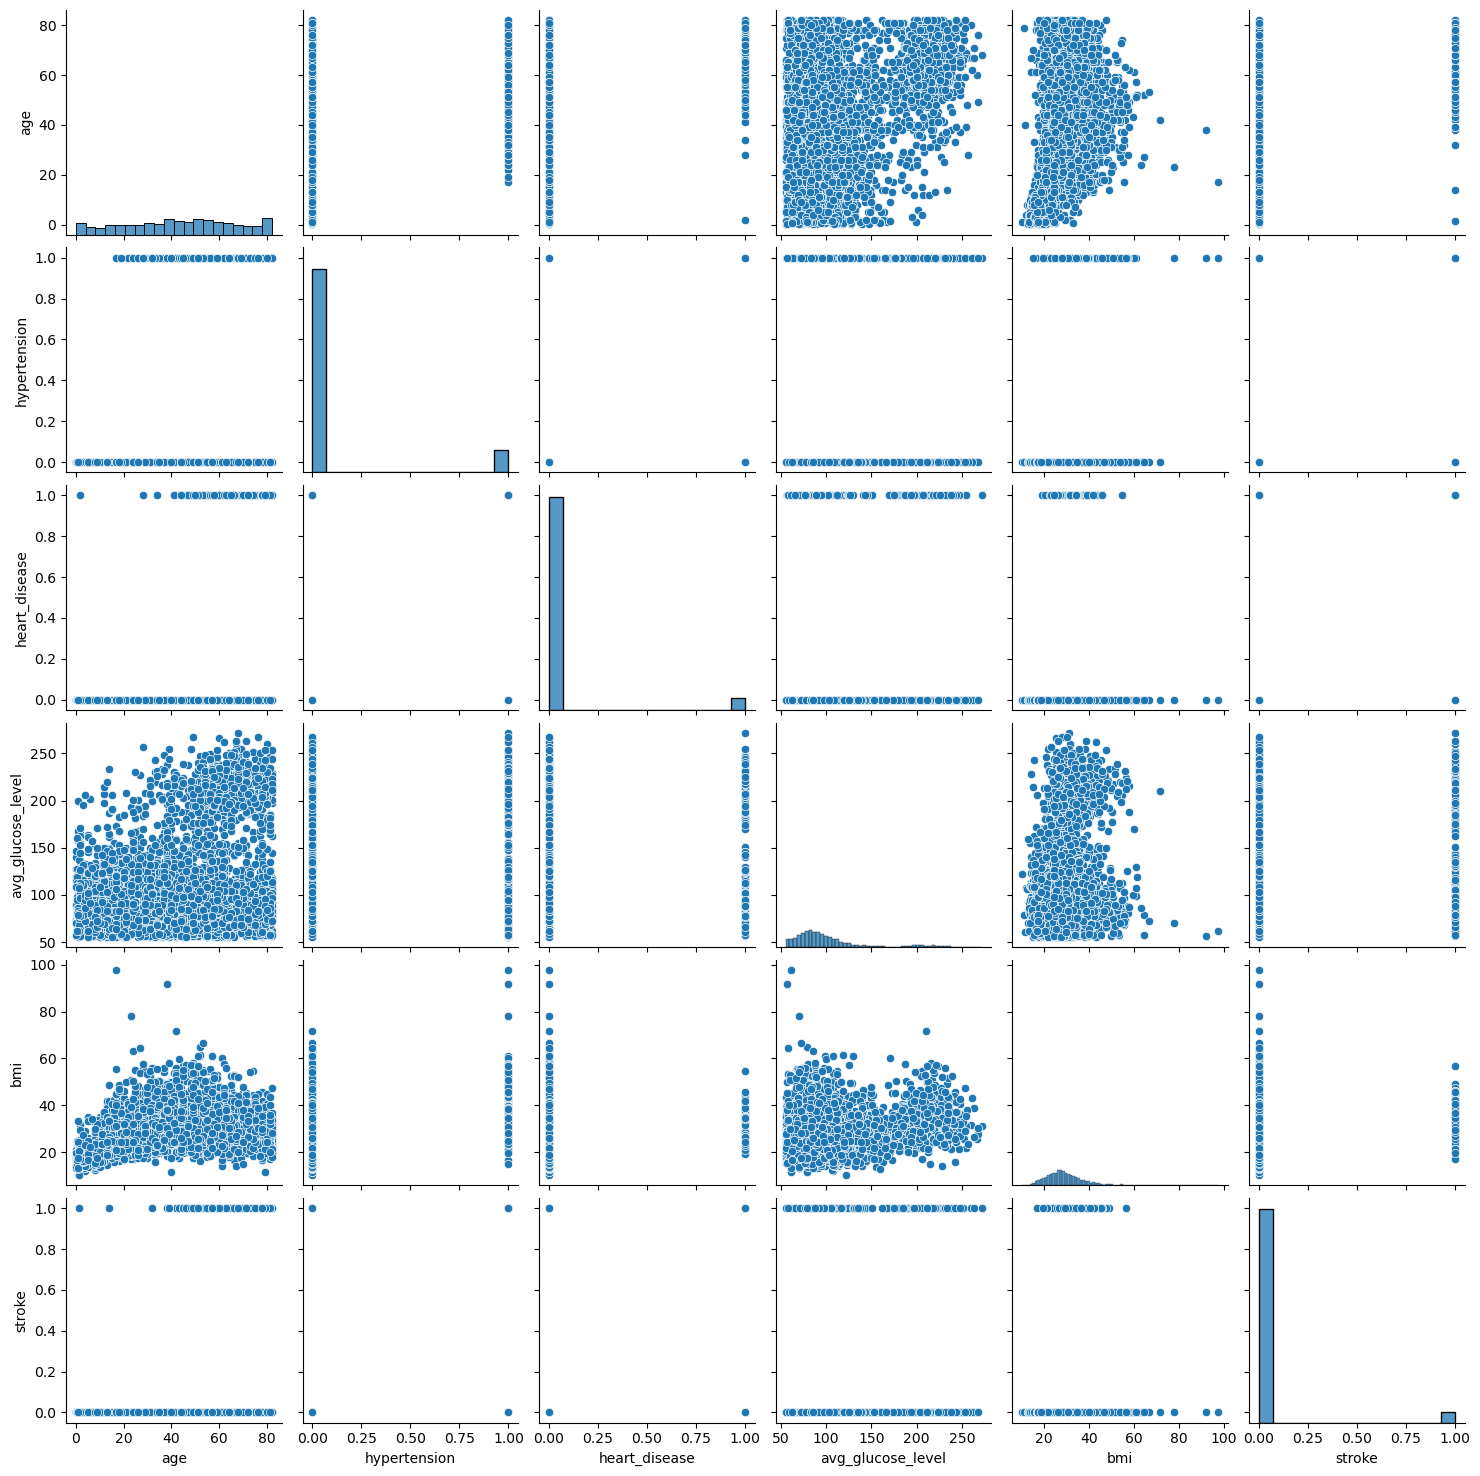

In [51]:
#Displaying pair plot
sns.pairplot(strdata)

In [52]:
# Displaying the duplicate values
strdata.duplicated().any()

False

In [53]:
# Displaying the null values
strdata.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [54]:
# Filling null values in bmi with mean
strdata.bmi.fillna(strdata.bmi.mean(),inplace=True)

In [55]:
# checking the datatypes
strdata.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# EXPLORATORY DATA ANALYSIS

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


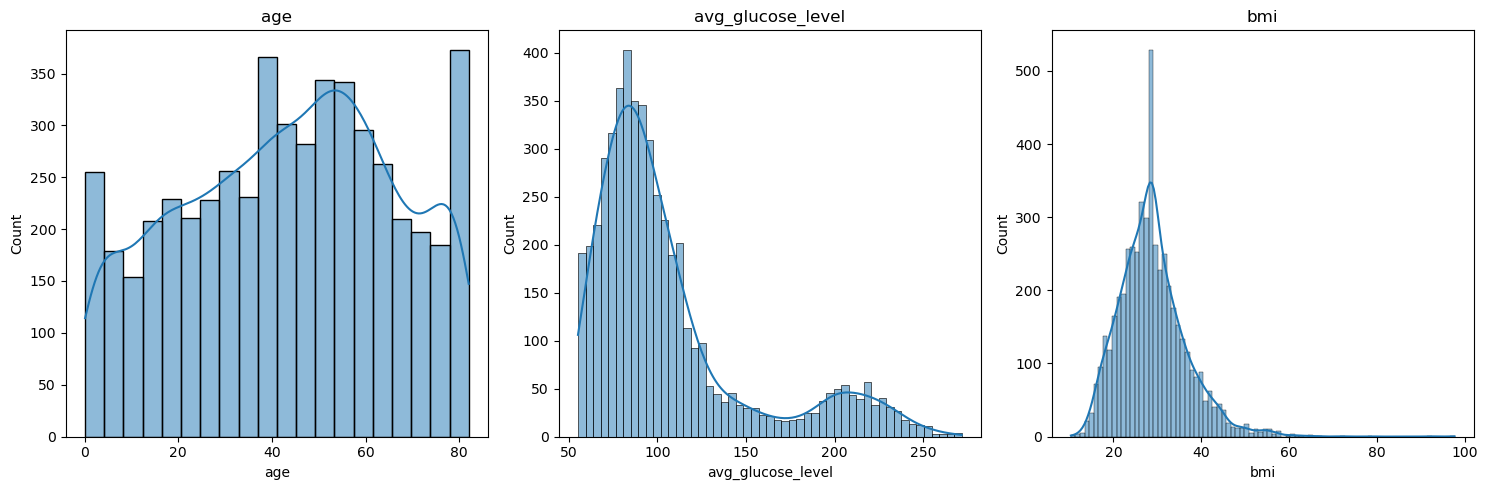

In [56]:
# Visualizing distribution of numerical columns
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(strdata[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


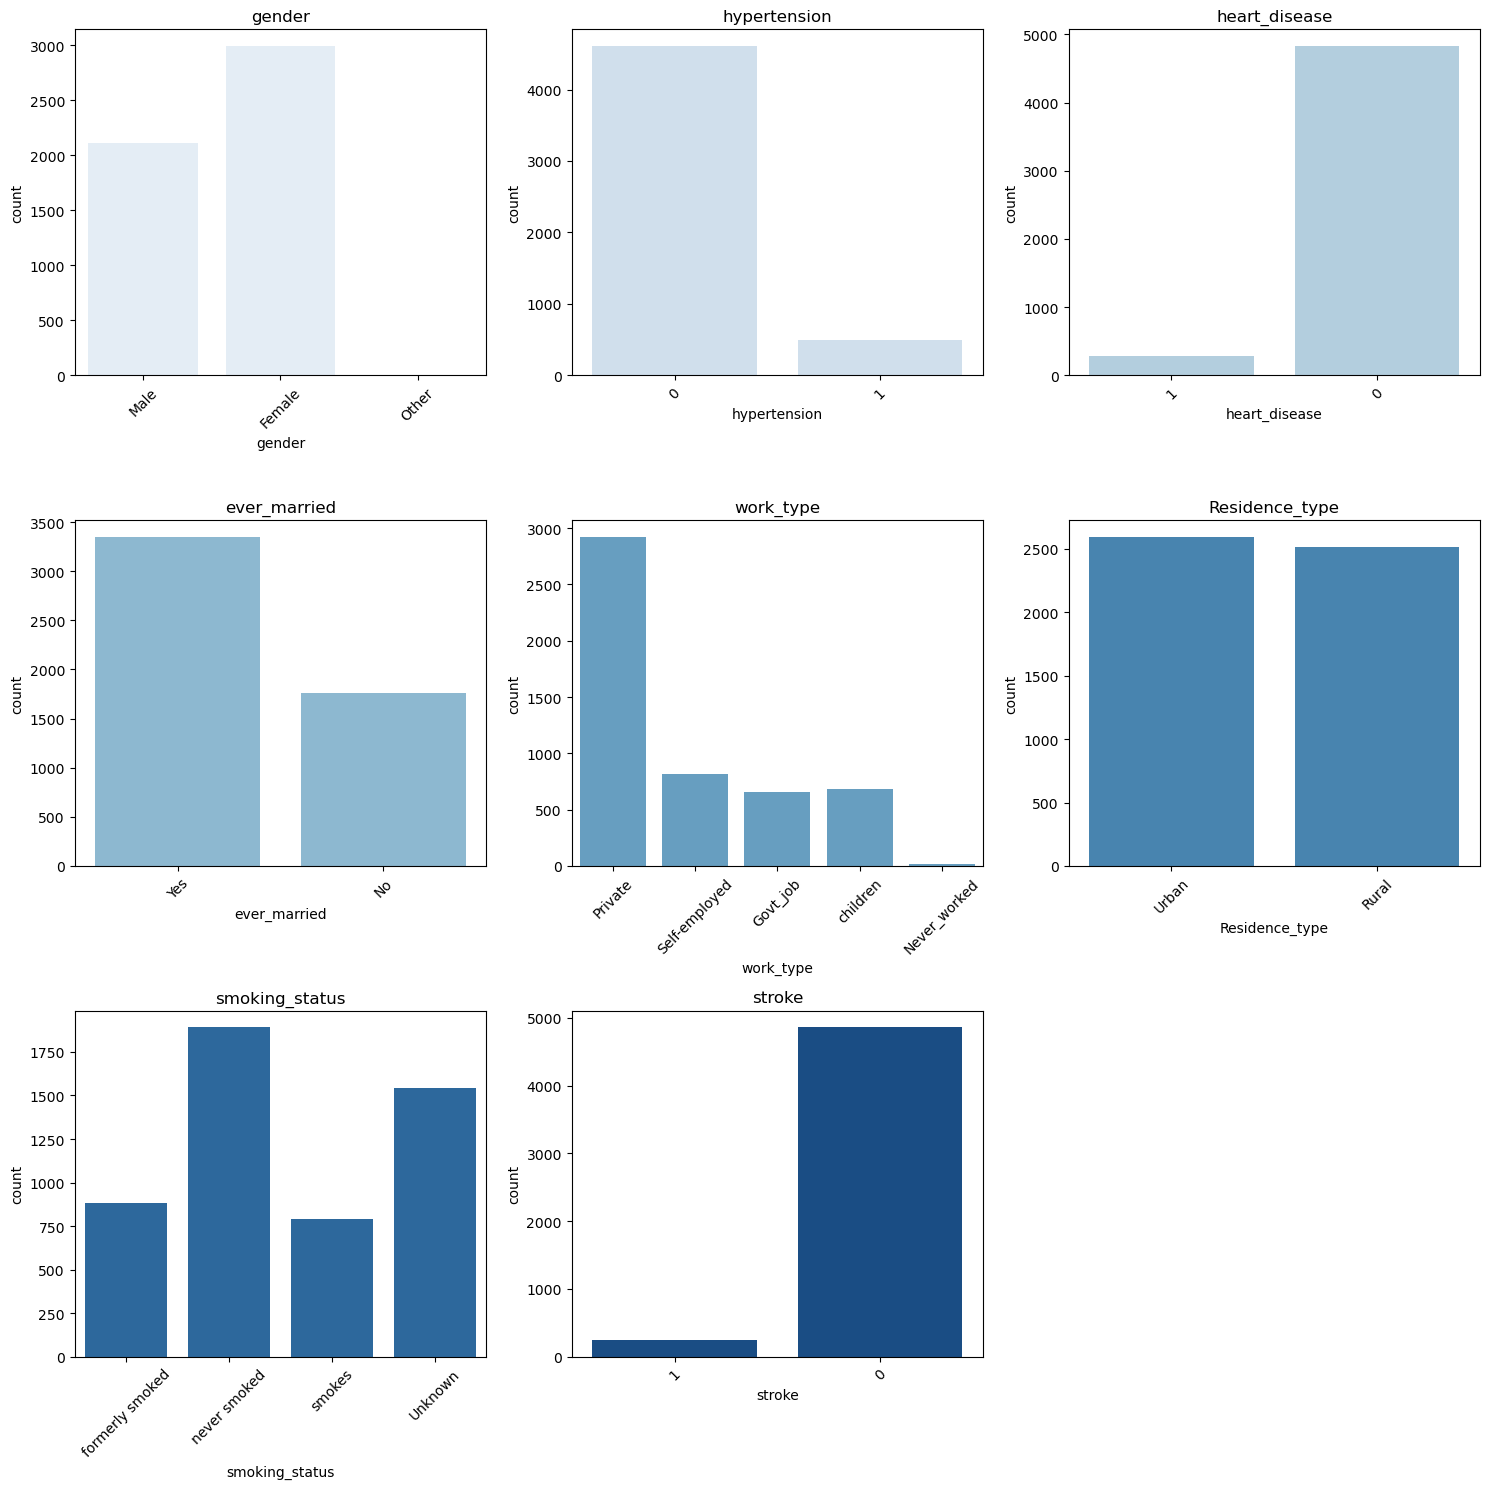

In [57]:
# Specify categorical columns
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Convert all categorical columns to strings
strdata[categorical_cols] = strdata[categorical_cols].astype(str)

# Define a color palette with shades of blue
color_palette = sns.color_palette("Blues", len(categorical_cols))

# Plotting count plots for categorical variables
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=strdata, x=col, palette=[color_palette[i-1]])
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### CHECKING FOR OUTLIERS OUTLIERS

<Axes: >

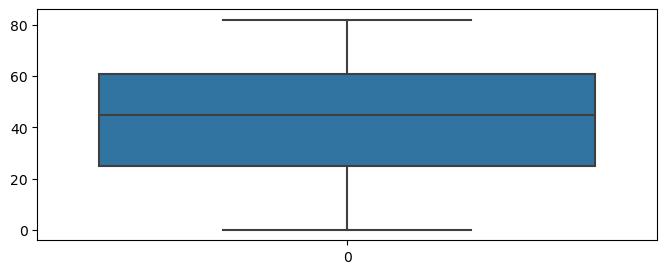

In [58]:
plt.figure(figsize=(8,3))
sns.boxplot(strdata.age)

<Axes: >

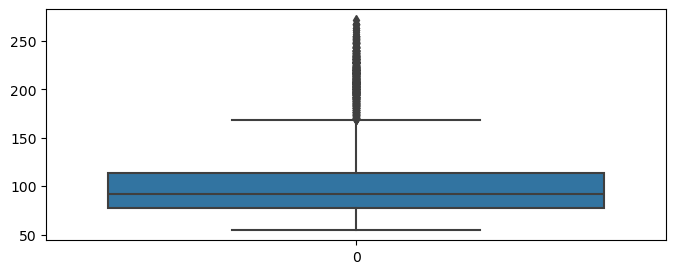

In [59]:
plt.figure(figsize=(8,3))
sns.boxplot(strdata.avg_glucose_level)

<Axes: >

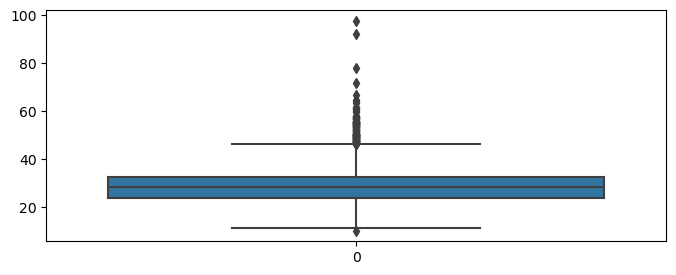

In [60]:
plt.figure(figsize=(8,3))
sns.boxplot(strdata.bmi)

In [61]:
# Define numerical columns
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

# Apply Winsorization to numerical columns
for col in numerical_cols:
    strdata[col] = winsorize(strdata[col], limits=[0.05, 0.05])

In [62]:
# Specify columns to one-hot encode
columns_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Convert specified columns to one-hot encoding
strdata = pd.get_dummies(strdata, columns=columns_to_encode)

# Convert boolean values to integers (1s and 0s)
strdata_encoded = strdata.astype(int)

In [63]:
strdata_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,216,36,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61,0,0,202,28,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,79,0,1,105,32,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49,0,0,171,34,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79,1,0,174,24,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


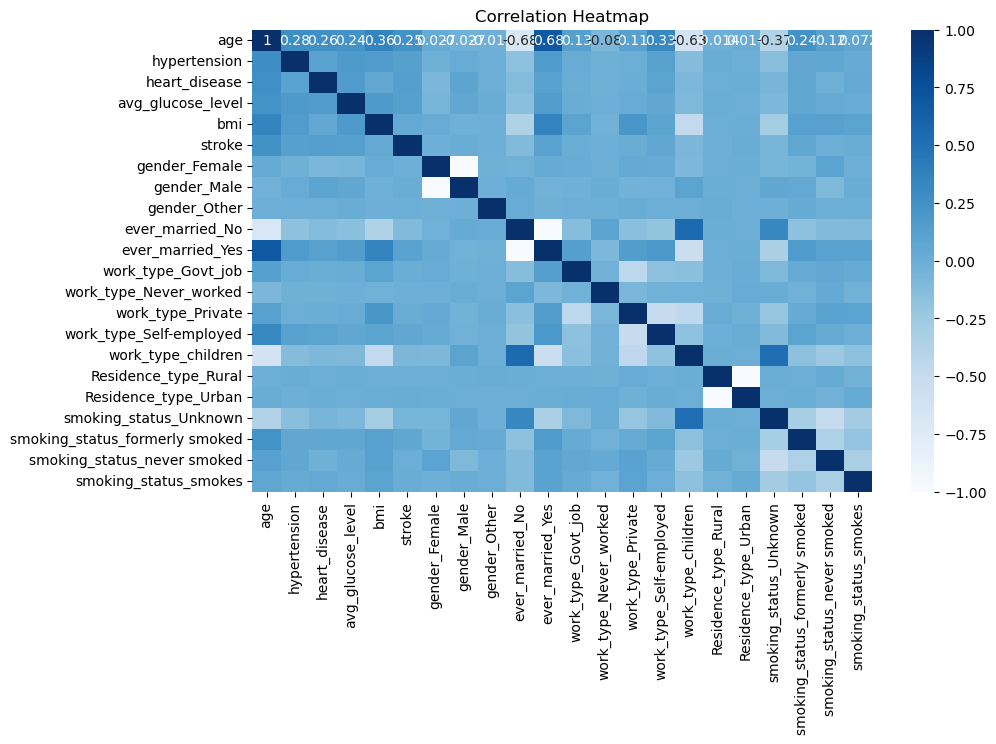

In [64]:
# Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(strdata_encoded.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [65]:
# Define features (X) and target variable (y)
X = strdata_encoded.drop(['stroke'], axis=1)  
y = strdata_encoded['stroke']

In [66]:
# balancing the data
strdata_encoded.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [67]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [68]:
# Verify the balance of the new dataset
print(y_smote.value_counts())

stroke
1    4861
0    4861
Name: count, dtype: int64


In [69]:
# split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [70]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# DECISION TREE

Accuracy: 0.9460154241645244

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       975
           1       0.94      0.95      0.95       970

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



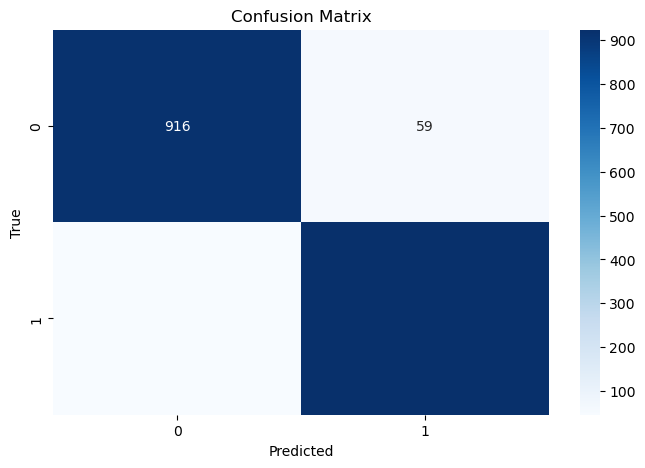

In [71]:
# Build and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## HYPERPARAMETER TUNING DECISION TREE

Best hyperparameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9419023136246787

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       975
           1       0.94      0.95      0.94       970

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945



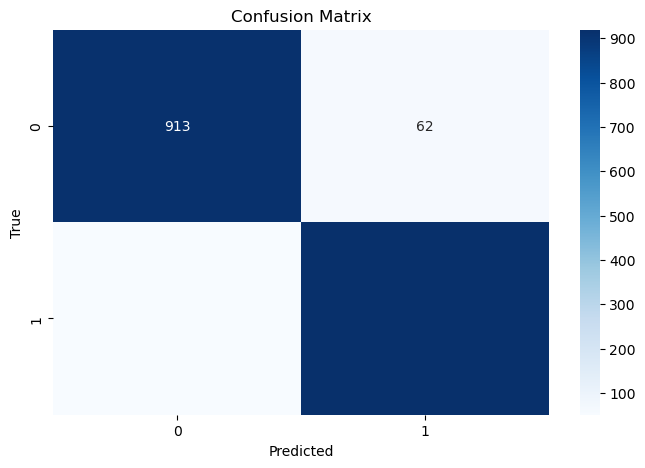

In [72]:
# Define the parameter grid
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Train the model with the best hyperparameters
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

# Make predictions
y_pred = best_dt.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## MLP

Accuracy: 0.9547557840616967

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       975
           1       0.99      0.92      0.95       970

    accuracy                           0.95      1945
   macro avg       0.96      0.95      0.95      1945
weighted avg       0.96      0.95      0.95      1945



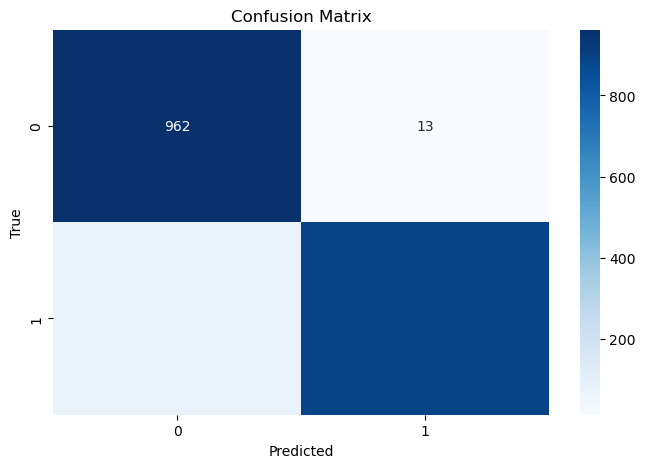

In [31]:
# Build and train the MLP model
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## HYPERPARAMETER TUNING MLP

Best hyperparameters found:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy: 0.9547557840616967

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       975
           1       0.99      0.92      0.95       970

    accuracy                           0.95      1945
   macro avg       0.96      0.95      0.95      1945
weighted avg       0.96      0.95      0.95      1945



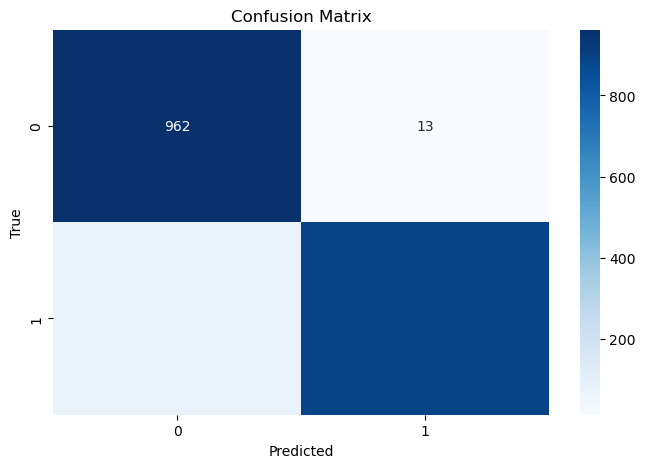

In [32]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100,)],
    'activation': [ 'relu'],
    'solver': [ 'adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Train the model with the best hyperparameters
best_mlp = grid_search.best_estimator_
best_mlp.fit(X_train, y_train)

# Make predictions
y_pred = best_mlp.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## KNN 

Accuracy: 0.889974293059126

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88       975
           1       0.83      0.98      0.90       970

    accuracy                           0.89      1945
   macro avg       0.90      0.89      0.89      1945
weighted avg       0.90      0.89      0.89      1945



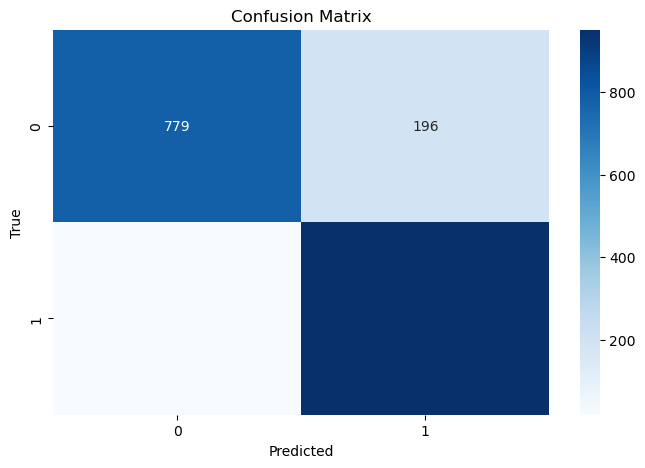

In [33]:
# Build and train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## HYPERPARAMETER TUNING KNN

Best hyperparameters found:  {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.9059125964010283

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90       975
           1       0.85      0.99      0.91       970

    accuracy                           0.91      1945
   macro avg       0.92      0.91      0.91      1945
weighted avg       0.92      0.91      0.91      1945



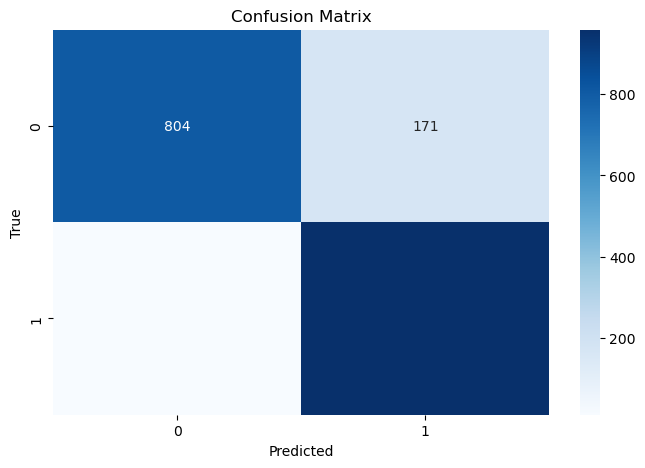

In [34]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3,  9],
    'weights': ['uniform', ],
    'algorithm': ['auto']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Train the model with the best hyperparameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# Make predictions
y_pred = best_knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## CROSS VALIDATION

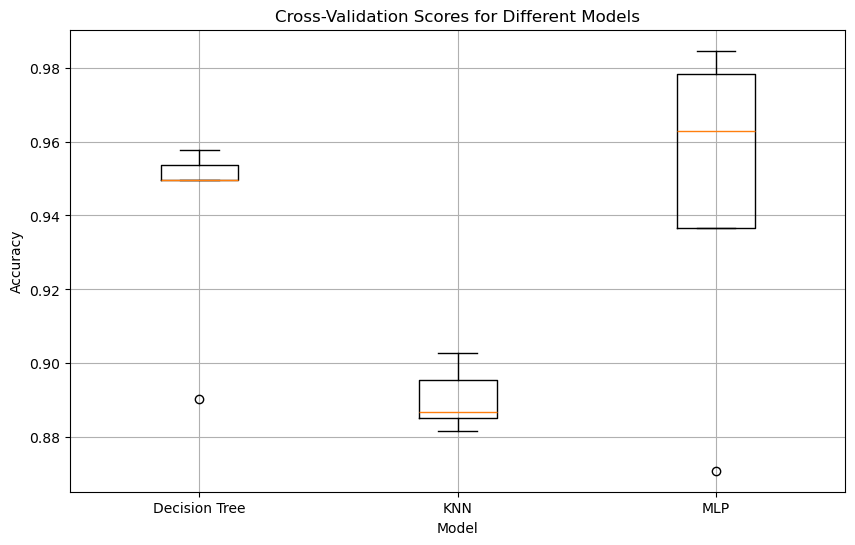

In [35]:
# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1000)
}

# Perform cross-validation and collect scores
all_scores = {name: cross_val_score(model, X_smote, y_smote, cv=5) for name, model in models.items()}

# Plot box plot
plt.figure(figsize=(10, 6))
plt.boxplot(all_scores.values(), labels=all_scores.keys())
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

## Receiver Operating Characteristic (ROC)

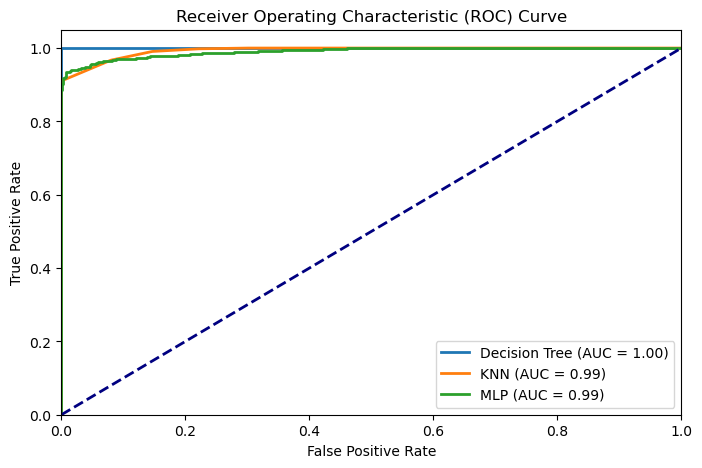

In [36]:
# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1000)
}
# Plot ROC curves
plt.figure(figsize=(8, 5))

for name, model in models.items():
    model.fit(X_smote, y_smote)
    if hasattr(model, "predict_proba"):
        prob_pos = model.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, prob_pos)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Precision-Recall curves

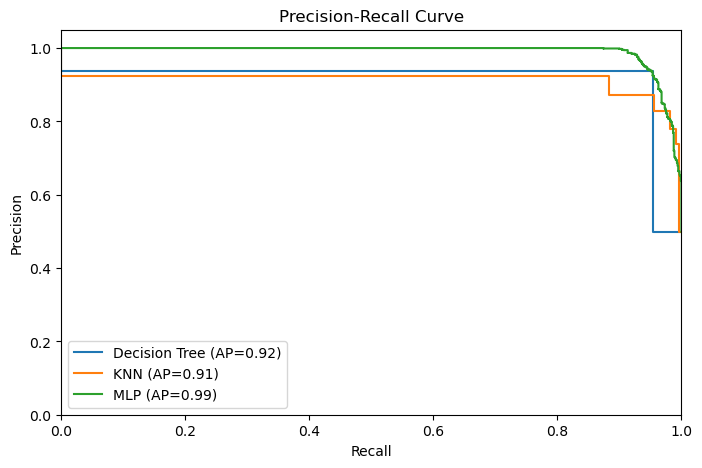

In [37]:
# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1000)
}

plt.figure(figsize=(8, 5))

# Plot Precision-Recall curves for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        prob_pos = model.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = model.decision_function(X_test)
    precision, recall, _ = precision_recall_curve(y_test, prob_pos)
    average_precision = average_precision_score(y_test, prob_pos)
    plt.step(recall, precision, where='post', label=f'{name} (AP={average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Reinforcement Learning

## Discretizing the State Space

In [73]:
from sklearn.preprocessing import KBinsDiscretizer

# Discretize the state space
n_bins = 5
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
X_discrete = discretizer.fit_transform(X_smote)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


## Defining the Synthetic Environment

In [74]:
class SyntheticEnv:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.state = None
        self.steps = 0
        self.max_steps = len(X)
        self.reset()
    
    def reset(self):
        self.steps = 0
        self.state = tuple(map(int, self.X[self.steps]))
        return self.state
    
    def step(self, action):
        reward = 0
        if action == 1 and self.y[self.steps] == 1:
            reward = 1
        self.steps += 1
        done = self.steps >= self.max_steps
        if not done:
            self.state = tuple(map(int, self.X[self.steps]))
        return self.state, reward, done

env = SyntheticEnv(X_discrete, y_smote)

## Initializing Q-Table and Hyperparameters

In [75]:
# Initialize Q-table as a dictionary
q_table = {}

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration-exploitation parameter
epsilon_min = 0.01
epsilon_decay = 0.995
episodes = 5000
action_size = 2  # 0: do nothing, 1: offer incentive

## Implementing Q-Learning Algorithm

In [76]:
import random

for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = random.choice(range(action_size))
        else:
            action = np.argmax(q_table.get(state, [0, 0]))
        
        next_state, reward, done = env.step(action)
        
        if state not in q_table:
            q_table[state] = [0] * action_size
        if next_state not in q_table:
            q_table[next_state] = [0] * action_size
        
        q_value = q_table[state][action]
        best_q_value = max(q_table[next_state])
        q_table[state][action] = q_value + alpha * (reward + gamma * best_q_value - q_value)
        
        state = next_state
        total_reward += reward

    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    if (episode + 1) % 100 == 0:
        print(f'Episode: {episode + 1}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}')

Episode: 100, Total Reward: 3301, Epsilon: 0.606
Episode: 200, Total Reward: 3856, Epsilon: 0.367
Episode: 300, Total Reward: 4151, Epsilon: 0.222
Episode: 400, Total Reward: 4396, Epsilon: 0.135
Episode: 500, Total Reward: 4521, Epsilon: 0.082
Episode: 600, Total Reward: 4579, Epsilon: 0.049
Episode: 700, Total Reward: 4684, Epsilon: 0.030
Episode: 800, Total Reward: 4719, Epsilon: 0.018
Episode: 900, Total Reward: 4756, Epsilon: 0.011
Episode: 1000, Total Reward: 4758, Epsilon: 0.010
Episode: 1100, Total Reward: 4760, Epsilon: 0.010
Episode: 1200, Total Reward: 4772, Epsilon: 0.010
Episode: 1300, Total Reward: 4778, Epsilon: 0.010
Episode: 1400, Total Reward: 4755, Epsilon: 0.010
Episode: 1500, Total Reward: 4775, Epsilon: 0.010
Episode: 1600, Total Reward: 4749, Epsilon: 0.010
Episode: 1700, Total Reward: 4751, Epsilon: 0.010
Episode: 1800, Total Reward: 4758, Epsilon: 0.010
Episode: 1900, Total Reward: 4752, Epsilon: 0.010
Episode: 2000, Total Reward: 4765, Epsilon: 0.010
Episode: 

## Evaluating the Agent

Total Rewards: 4789
Churns Prevented: 4789
Accuracy: 0.7423369677021189
Precision: 0.6631127111603434
Recall: 0.9851882328738942
F1 Score: 0.7926839361085823


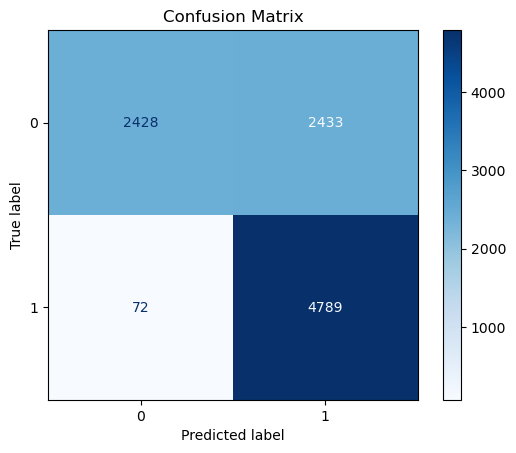

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluate the agent systematically
total_rewards = 0
churns_prevented = 0
true_labels = []
pred_labels = []

state = env.reset()
done = False

while not done:
    action = np.argmax(q_table.get(state, [0, 0]))
    next_state, reward, done = env.step(action)
    state = next_state
    total_rewards += reward
    if reward == 1:
        churns_prevented += 1
    true_labels.append(env.y[env.steps - 1])  # True label
    pred_labels.append(action)  # Predicted action as label

print(f'Total Rewards: {total_rewards}')
print(f'Churns Prevented: {churns_prevented}')

# Calculate metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)
conf_matrix = confusion_matrix(true_labels, pred_labels)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Analyzing Q-Values and State Visits

In [78]:
# Print a subset of the Q-table for analysis
print("Q-values for some states:")
for state in list(q_table)[:5]:
    print(f"State: {state}, Q-values: {q_table[state]}")

Q-values for some states:
State: (4, 0, 4, 4, 3, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0), Q-values: [65.72760249332335, 66.13209684718322]
State: (3, 0, 0, 4, 2, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 4, 0), Q-values: [57.177875328801626, 64.94107055914458]
State: (4, 0, 4, 1, 3, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4, 0), Q-values: [29.9220507804347, 33.80190093141068]
State: (2, 0, 0, 3, 3, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4), Q-values: [31.212659740783042, 33.13520195982871]
State: (4, 4, 0, 3, 1, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 4, 0), Q-values: [30.48591345633488, 32.46283204716847]


## Precision Recall Curve

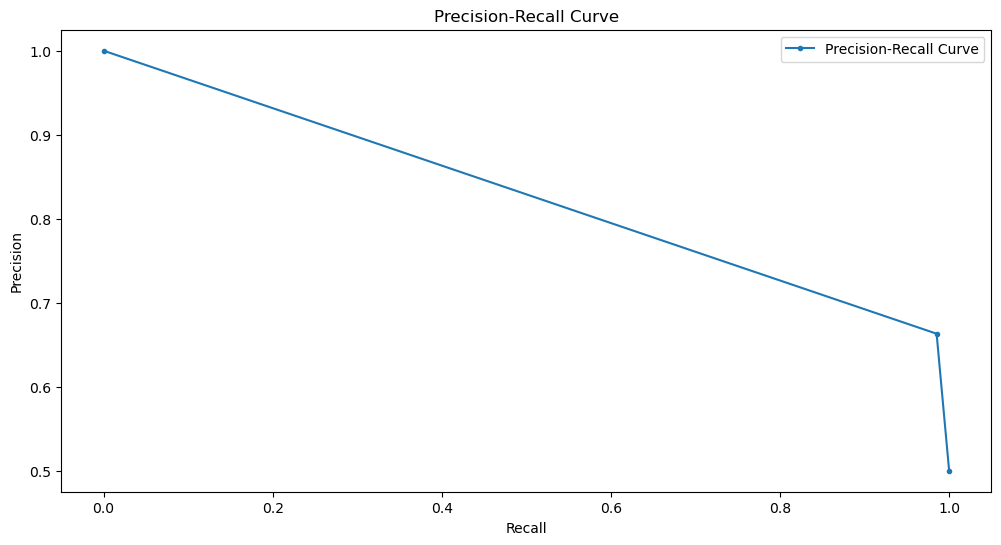

In [79]:
# Generate and plot the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(true_labels, pred_labels)

plt.figure(figsize=(12, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## Loading Required Libraries

In [3]:
!pip install swiplserver
!pip3 install pyswip
!pip install PyILP

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement 

# Inductive Logic Programming

## Preprocessing the Dataset for ILP requirements

In [4]:
# Load the dataset
healthcare_ILP = pd.read_csv('healthcare-dataset-stroke-data.csv')
print(healthcare_ILP.head)

<bound method NDFrame.head of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban   

## Selecting Feature And Target Columns

In [19]:
# Drop unnecessary column
healthcare_ILP.drop('id', axis=1, inplace=True)
# Replace empty strings or spaces with NaN in the TotalCharges column
healthcare_ILP['bmi'] = healthcare_ILP['bmi'].replace(' ', pd.NA)
# Drop rows with NaN values in the TotalCharges column
healthcare_ILP = healthcare_ILP.dropna(subset=['bmi'])

# Sample the data
sampled_data = healthcare_ILP.sample(n=2500, random_state=42)


## Importing PyGol Library¶


In [20]:
# Selecting Feature Columns for PyGol
feature_col = sampled_data.columns[:-1]

# Selecting Target Column for PyGol
target = sampled_data.columns[-1]

## Generating First-Order Logic Rules for Predictive Modeling using PyGol¶

In [21]:
import sys
sys.path.insert(0, '../../')
from PyGol import *

## Learning First-Order Logic Model using Aleph

In [22]:
from PyGol import prepare_logic_rules, prepare_examples, read_constants_meta_info, bottom_clause_generation

# Generate first-order logic rules as background knowledge for PyGol
background = prepare_logic_rules(sampled_data, feature_col, meta_information="meta_data.info", default_div=4, conditions={})

# Generate Examples files
examples = prepare_examples(sampled_data, target)

# Generate Constant list
const = read_constants_meta_info()

# Generate Bottom Clause
P, N = bottom_clause_generation(file="BK.pl", constant_set=const, container="dict",
                                positive_example="pos_example.f", negative_example="neg_example.n")

100%|████████████████████████████████████████| 108/108 [00:01<00:00, 103.71it/s]


## ILP Result

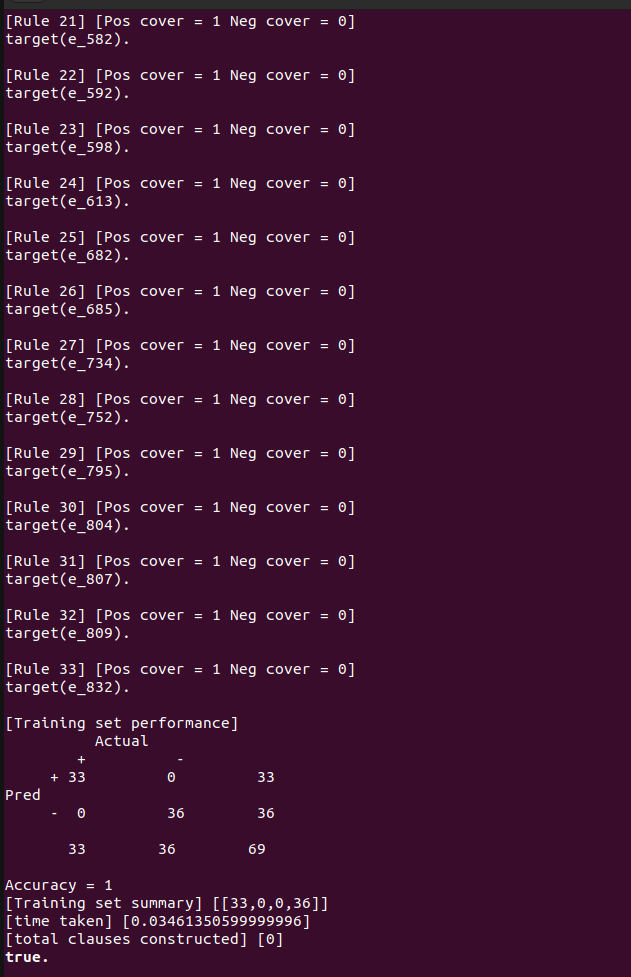

In [23]:
from IPython.display import Image

# Display an image file
image_path = "/user/HS402/ss05145/Pictures/Screenshots/Screenshot from 2024-05-29 01-31-33.png"
Image(filename=image_path)